## CCNSS 2021 Tutorial: Dynamical System - Part I

## Objectives
In this notebook we will use the *Wilson-Cowan* rate model as an example to learn basic concepts in dynamical systems, including phase planes, nullclines, and attractors.

**Reference paper:** 
* Wilson H and Cowan J (1972) Excitatory and inhibitory interactions in localized populations of model neurons. Biophysical Journal Vol. 12.


## Background

The Wilson-Cowan equations model the mean-field (i.e., average across the population) dynamics of two coupled populations of excitatory (E) and inhibitory (I) neurons:

\begin{align}
&\tau_E \frac{dE}{dt} = -E + (1 - r E) F(w_{EE}E -w_{EI}I + I_{ext};a,\theta)\\
&\tau_I \frac{dI}{dt} = -I + (1 - r I) F(w_{IE}E -w_{II}I;a,\theta)
\end{align}

$E(t)$ represents the average activation of the excitatory population, and $I(t)$ the activation of the inhibitory population. The parameters $\tau_E$ and $\tau_I$ control the timescales of each population. The connection strengths are given by: $w_{EE}$ (E to E), $w_{EI}$ (I to E), $w_{IE}$ (E to I), and $w_{II}$ (I to I). Refractory effects are modeled through the parameter $r$, and $I_{ext}$ represents external input to the excitatory population. 



The function $F$ describes the population activation function. We assume $F$ to be a sigmoidal function, which is parameterized by its gain $a$ and threshold $\theta$.

$$ F(x;a,\theta) = \frac{1}{1+\exp\{-a(x-\theta)\}} - \frac{1}{1+\exp\{a\theta\}}$$

The argument $x$ represents the input to the population. Note that the the second term is chosen so that $F(0;a,\theta)=0$. The model is intersting as it can generate rich dynamics of neuronal behavior as observed in experiments. Here we use it as an example to illustrate the math tools to analyze the long-time behavior of a dynamical system. 

To start, please execute the cell below to initialize the notebook environment.

In [1]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import random                      # import basic random number generator functions

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

And execute the cell below to initialize the simulation parameters.

In [2]:
# time stepsize for simulation
dt = 0.1

# Connection weights
wEE = 12
wEI = 4
wIE = 13
wII = 11

# Refractory parameter
r = 1

# External input
I_ext = 0

# Excitatory parameters
tau_E = 1       # Timescale of excitatory population
a_E = 1.2       # Gain of excitatory population
theta_E = 2.8   # Threshold of excitatory population

# Inhibitory parameters
tau_I = 1       # Timescale of inhibitory population
a_I = 1         # Gain of inhibitory population
theta_I = 4     # Threshold of inhibitory population

**EXERCISE 1** 

Fill in the function below to define the activation function $F$ as a function of its input $x$, and arguments $a$ and $\theta$. Verify your function by evaluating the excitatory activation function for $x = 0,3,6$. Then plot $F$ for both E and I population parameters over $0 \leq x \leq 10$. 

In [4]:
def F(x,a,theta): 
    """Population activation function.

    Arguments:
    x -- the population input
    a -- the gain of the function
    theta -- the threshold of the function
    
    Returns:
    y -- the population activation response
    """
    # insert your code here
    
    return y
  
# insert your code here

0.0
0.5261444259857104
0.9453894296980492


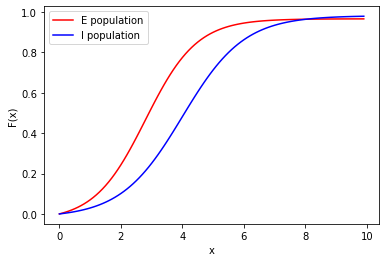

In [5]:
def F(x,a,theta): 
    """Population activation function.

    Arguments:
    x -- the population input
    a -- the gain of the function
    theta -- the threshold of the function
    
    Returns:
    y -- the population activation response
    """
    y = (1+np.exp(-a*(x-theta)))**-1 - (1+np.exp(a*theta))**-1
    return y
  
for x in [0,3,6]:
    print(F(x, a_E, theta_E))

x = np.arange(0,10,.1)
plt.figure()
plt.plot(x,F(x,a_E,theta_E),'r')
plt.plot(x,F(x,a_I,theta_I),'b')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend(['E population','I population'])
plt.show()

**EXPECTED OUTPUT**

<img src="expect_figs/DS-1.png" alt="Drawing" style="width: 400px;"/>

**Exercise 2:** Fill in the function below to simulate the dynamics of the Wilson-Cowan equation for up to $t_{max}=15$ with steps of $\Delta t$. Note that we can numerically integrate the ODEs by replacing the derivatives at time $t=k \Delta t$ with their discretized approximations (Euler Scheme):

\begin{align}
&\frac{dE}{dt} \to \frac{E[(k+1)\Delta t]-E[k\Delta t]}{\Delta t} \hspace{5 mm}\text{ and }\hspace{5mm}\frac{dI}{dt} \to \frac{I[(k+1)\Delta t]-I[k\Delta t]}{\Delta t}\\
\end{align}

Then simulate the dynamics of the population starting from initial condition $E_0=I_0=0.2$ and plot the results. What is the steady state solution? Then, also plot the dynamics starting from $E_0=I_0=0.25$ and plot the solution (in dashed lines). Now what is the steady state solution?

In [6]:
def simulate_wc(t,E0,I0):
    """Simulate the Wilson-Cowan equations.
   
    Arguments:
    t -- time (vector)
    E0 -- initial condition of the excitatory population
    I0 -- initial condition of the inhibitory population
    
    Returns:
    E -- Activity of excitatory population (vector)
    I -- Activity of inhibitory population (vector)
    """
    # insert your code here
    
    return E,I

# insert your code here

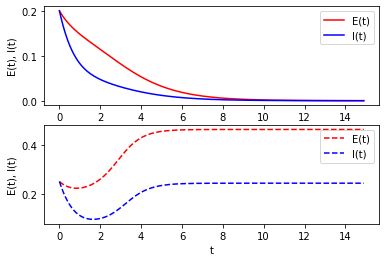

In [7]:
def simulate_wc(t,E0,I0):
    """Simulate the Wilson-Cowan equations.
   
    Arguments:
    t -- time (vector)
    E0 -- initial condition of the excitatory population
    I0 -- initial condition of the inhibitory population
    
    Returns:
    E -- Activity of excitatory population (vector)
    I -- Activity of inhibitory population (vector)
    """
    dt = t[1]-t[0]
    E = np.zeros(len(t))
    I = np.zeros(len(t))
    E[0] = E0
    I[0] = I0
    for k in range(len(t)-1):
        E[k+1] = E[k] + dt/tau_E * (-E[k]+(1-r*E[k])*F(wEE*E[k]-wEI*I[k]+I_ext,a_E,theta_E))
        I[k+1] = I[k] + dt/tau_I * (-I[k]+(1-r*I[k])*F(wIE*E[k]-wII*I[k],a_I,theta_I))
    return E,I

t = np.arange(0,15,dt)
E,I = simulate_wc(t,.2,.2)

plt.subplot(2,1,1)
plt.plot(t,E,'r')
plt.plot(t,I,'b')
plt.xlabel('t')
plt.ylabel('E(t), I(t)')
plt.legend(['E(t)','I(t)'],loc='best')
plt.subplot(2,1,2)
E,I = simulate_wc(t,.25,.25)
plt.plot(t,E,'--r')
plt.plot(t,I,'--b')
plt.xlabel('t')
plt.ylabel('E(t), I(t)')
plt.legend(['E(t)','I(t)'],loc='best')
plt.show()

**EXPECTED OUTPUT**

<img src="expect_figs/DS-2.png" alt="Drawing" style="width: 400px;"/>

**Exercise 3:** Now use the same function to simulate the Wilson-Cowan equations for different initial conditions from $0.01 \leq E_0 \leq 1$ and $0.01 \leq I_0 \leq 1$ with stepsize 0.1. For each initial condition, find the steady state value to which $E$ and $I$ converge. There are several ways to do this. A simple way to do this is to check, for each initial condition, that the last two points in the simulation are within 1% of each other:

$$ \frac{E(t_{max})-E(t_{max}-\Delta t)}{E(t_{max})} \leq 0.01 $$

Execute the cell below to define the function ``convergence_check()``, which raises an error when trajectories have not converged:

``raise ValueError('Has not converged.')``

In [8]:
def convergence_check(E):
    if np.abs(E[-1]-E[-2])/E[-1] > .01:
        raise ValueError('Has not converged.')

Now plot the steady state values, i.e., the last values in the trajectory (plot $E$ vs. $I$). Use the function ``convergence_check()`` to check whether the solution has reached steady state. If there is an error, increase $t_{max}$ until there is no error.  What fixed points do you see?

In [7]:
# insert your code here

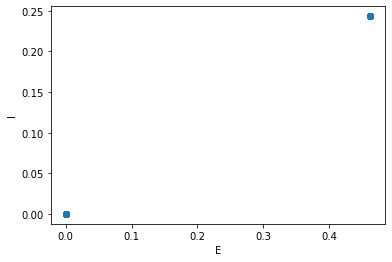

In [9]:
t = np.arange(0,100,dt)

plt.figure()
for E_0 in np.linspace(0.01,1,11):
    for I_0 in np.linspace(0.01,1,11):
        E,I = simulate_wc(t,E_0,I_0)
        convergence_check(E)
        convergence_check(I)
        plt.plot(E[-1],I[-1],'C0o')
        plt.xlabel('E')
        plt.ylabel('I')
        
plt.show()

**EXPECTED OUTPUT**

<img src="expect_figs/DS-3.png" alt="Drawing" style="width: 400px;"/>

**Exercise 4**: To make the phase plane plot, we first need to determine the inverse of $F$. Enter the cell below to define $F^{-1}(x;a,\theta)$,

In [10]:
def F_inv(x,a,theta): 
    """Define the inverse of the population activation function.

    Arguments:
    x -- the population input
    a -- the gain of the function
    theta -- the threshold of the function
    
    Returns:
    y -- value of the inverse function
    """
    y = -1/a * np.log((x+(1+np.exp(a*theta))**-1)**-1 -1) + theta
    
    return y

Now check that this is the correct inverse function by testing $F^{-1}(x;a,\theta)$ for $x=0,0.5,0.9$, and then plotting x against $F^{-1}(F(x))$ for $0\leq x\leq1$ (use the excitatory population parameters).



In [10]:
# insert your code here

0.0
2.9120659956266
5.002378884081663


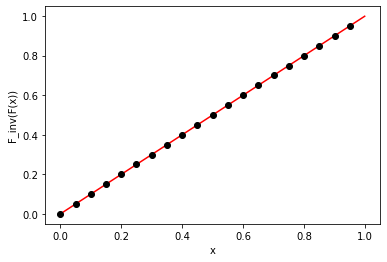

In [11]:
for x in [0,.5,.9]:
    print(F_inv(x, a_E, theta_E))
    
plt.figure()
x = np.arange(0,1,.001)
plt.plot(x,x,'-r')

for x in np.arange(0,1,.05):
    plt.plot(x,F_inv(F(x,a_E,theta_E),a_E,theta_E),'ko')
plt.xlabel('x')
plt.ylabel('F_inv(F(x))')
plt.show()

**EXPECTED OUTPUT**

<img src="expect_figs/DS-4.png" alt="Drawing" style="width: 400px;"/>

**Exercise 5:** Now, derive the E and I nullclines, in terms of the inverse function $F^{-1}$. To do this, set $\frac{dE}{dt}=0$ and solve for $I$, then set $\frac{dI}{dt}=0$ and solve for $E$. Then, fill out the two functions below to calculate the I nullcline (over $-0.01 \leq I \leq 0.3$) and E nullcline (over $-0.01 \leq E \leq 0.48$). First test the value of the I nullcline for $I=0.1$, then test the E nullcline for $E=0.1$. Then use these functions to plot the nullclines in phase space (E vs. I). What fixed points do you see? Compare the intersections of the nullclines with the steady state values you observed numerically in Exercise 3.


In [12]:
def get_E_nullcline(E):
    """Solve for I along the E nullcline (dE/dt = 0).
   
    Arguments:
    E -- values of E over which the nullcline is computed
    
    Returns:
    I -- values of I along the nullcline for each E
    """
    # insert your code here
    
    return I
  
def get_I_nullcline(I):
    """Solve for E along the I nullcline (dI/dt = 0).
   
    Arguments:
    I -- values of I over which the nullcline is computed
    
    Returns:
    E -- values of E along the nullcline for each I
    """
    # insert your code here
    
    return E

# insert your code here

0.24546433162390224
-0.029802383619274175


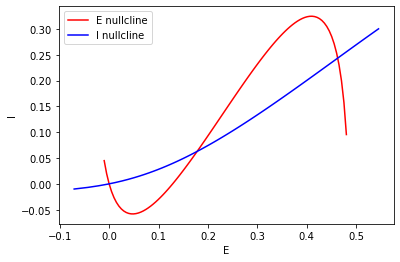

In [13]:
def get_E_nullcline(E):
    """Solve for I along the E nullcline (dE/dt = 0).
   
    Arguments:
    E -- values of E over which the nullcline is computed
    
    Returns:
    I -- values of I along the nullcline for each E
    """
    I = 1./wEI*(wEE*E+I_ext-F_inv(E/(1-r*E),a_E,theta_E))
    
    return I
  
  
def get_I_nullcline(I):
    """Solve for E along the I nullcline (dI/dt = 0).
   
    Arguments:
    I -- values of I over which the nullcline is computed
    
    Returns:
    E -- values of E along the nullcline for each I
    """
    E = 1./wIE*(wII*I+F_inv(I/(1-r*I),a_I,theta_I))
    
    return E


print(get_I_nullcline(0.1))
print(get_E_nullcline(0.1))

E = np.linspace(-0.01,.48,100)
E_nullcline = get_E_nullcline(E)

plt.figure()
plt.plot(E,E_nullcline,'r')

I = np.linspace(-.01,.3,100)
I_nullcline = get_I_nullcline(I)
plt.plot(I_nullcline,I,'b')
plt.xlabel('E')
plt.ylabel('I')
plt.legend(['E nullcline','I nullcline'])
plt.show()

**EXPECTED OUTPUT**

<img src="expect_figs/DS-5.png" alt="Drawing" style="width: 400px;"/>

**Exercise 6:** Now, on top of the nullclines, use two nested for loops to plot some sample trajectories starting with different initial conditions, for $E_0 = 0,0.2,0.4,0.8,1$ and $I_0 = 0,0.2,0.4,0.8,1$. How many attractors do you see?

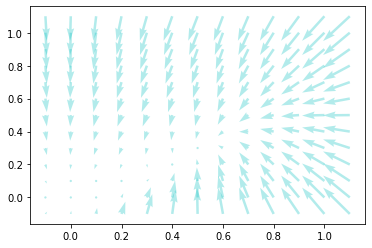

In [19]:
# insert your code here

#plot the vector field
for E_s in np.arange(-0.1,1.1,0.1):
    for I_s in np.arange(-0.1,1.1,0.1):
        d_E=(-E_s+(1-r*E_s)*F(wEE*E_s-wEI*I_s+I_ext,a_E,theta_E))/tau_E
        d_I=(-I_s+(1-r*I_s)*F(wIE*E_s-wII*I_s,a_I,theta_I))/tau_I
        #plt.arrow(E_s, I_s, d_E, d_I,length_includes_head=True,head_width=0.25, head_length=0.5, fc='r', ec='b')
        plt.quiver(E_s, I_s, d_E, d_I, scale=15,color='c',alpha=0.3)

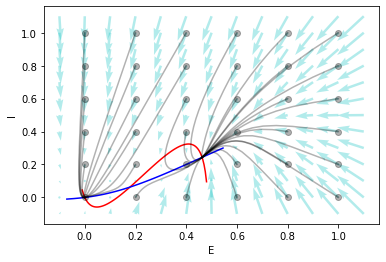

In [24]:
E = np.linspace(-.01,.48,100)
E_nullcline = get_E_nullcline(E)

fig=plt.figure()
plt.plot(E,E_nullcline,'r')

I = np.linspace(-.01,.3,100)
I_nullcline = get_I_nullcline(I)
plt.plot(I_nullcline,I,'b')

for E_0 in [0,.2,.4,.6,.8,1]:          
    for I_0 in [0,.2,.4,.6,.8,1]:    
      E,I = simulate_wc(t,E_0,I_0)
      plt.plot(E,I,'k',alpha=0.3)
      plt.plot(E_0,I_0,'ko',alpha=0.3)
      plt.xlabel('E')
      plt.ylabel('I')

#plot the vector field
for E_s in np.arange(-0.1,1.1,0.1):
    for I_s in np.arange(-0.1,1.1,0.1):
        d_E=(-E_s+(1-r*E_s)*F(wEE*E_s-wEI*I_s+I_ext,a_E,theta_E))/tau_E
        d_I=(-I_s+(1-r*I_s)*F(wIE*E_s-wII*I_s,a_I,theta_I))/tau_I
        #plt.arrow(E_s, I_s, d_E, d_I,length_includes_head=True,head_width=0.25, head_length=0.5, fc='r', ec='b')
        plt.quiver(E_s, I_s, d_E, d_I, scale=15,color='c',alpha=0.3)


**EXPECTED OUTPUT**

<img src="expect_figs/DS-6.png" alt="Drawing" style="width: 400px;"/>

**Exercise 7:** Repeat the previous exercise for the following values of the recurrent excitatory connection strength: $w_{EE}=5,10,12,15$. What is happening? This is an example of a bifurcation. What does this tell you about how increasing recurrent connectivity affects the dynamics? 

---



In [16]:
# insert your code here

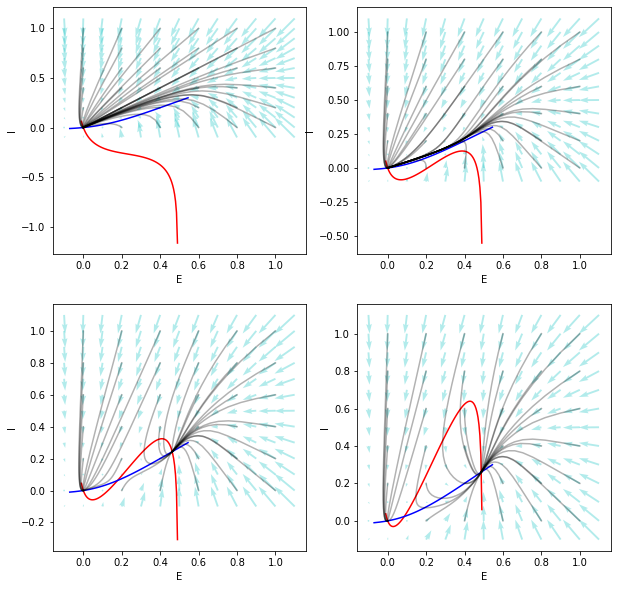

In [27]:
plt.figure(figsize=[10,10])
i=1
for wEE in [5,10,12,15]:
    plt.subplot(2,2,i)
    i=i+1
    E = np.linspace(-.01,.49,100)
    I = np.linspace(-.01,.3,100)
    E_nullcline = get_E_nullcline(E)

    plt.plot(E,E_nullcline,'r')
    
    I_nullcline = get_I_nullcline(I)
    plt.plot(I_nullcline,I,'b')
    for E_0 in [0,.2,.4,.6,.8,1]:
        for I_0 in [0,.2,.4,.6,.8,1]:
            E,I = simulate_wc(t,E_0,I_0)
            plt.plot(E,I,'k',alpha=0.3)
           
    plt.xlabel('E')
    plt.ylabel('I')

    #plot the vector field
    for E_s in np.arange(-0.1,1.1,0.1):
        for I_s in np.arange(-0.1,1.1,0.1):
            d_E=(-E_s+(1-r*E_s)*F(wEE*E_s-wEI*I_s+I_ext,a_E,theta_E))/tau_E
            d_I=(-I_s+(1-r*I_s)*F(wIE*E_s-wII*I_s,a_I,theta_I))/tau_I
            #plt.arrow(E_s, I_s, d_E, d_I,length_includes_head=True,head_width=0.25, head_length=0.5, fc='r', ec='b')
            plt.quiver(E_s, I_s, d_E, d_I, scale=15,color='c',alpha=0.3)

**EXPECTED OUTPUT**

<img src="expect_figs/DS-7.png" alt="Drawing" style="width: 700px;"/>

**BONUS 1: Stability Analysis** (See lecture notes)
Can you find the cordinates of the fixed points and perform the stability analysis of the fixed points numerically? You need to (1) first numerically find the ccoordinates of the intersection points of the two nullclines (e.g., search related functions on the web or use your eyes to read them out from the figures), and then (2) numerically compute the eigenvalues of the Jacobian matrix and check their signs.  

**BONUS 2: Neural Oscillations and Limit Cycle** (See lecture notes) Can you tune the parameters of time constants to find oscillatory behavior of the system? If you do, perform the phase plane analysis to view the limit cycle. W